In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

In [56]:
import piplite
await piplite.install('seaborn')

In [5]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [6]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [7]:
await download(filepath, "housing.csv")
file_name="housing.csv"

In [41]:
df = pd.read_csv(file_name)

In [17]:
# df.head()

In [42]:
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [43]:
df.drop(["id", "Unnamed: 0"], axis = 1, inplace = True)
summary = df.describe()
print(summary)

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

In [57]:
floor_counts = df["floors"].value_counts()
print(floor_counts.to_frame())

        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8
123


<function matplotlib.pyplot.show(close=None, block=None)>

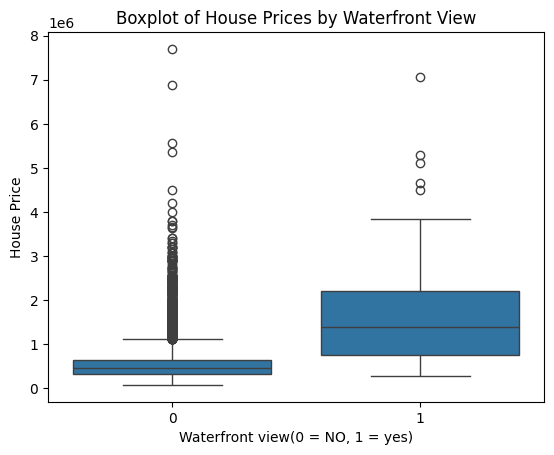

In [58]:
sns.boxplot(x="waterfront", y="price", data = df)
plt.title("Boxplot of House Prices by Waterfront View")
plt.xlabel("Waterfront view(0 = NO, 1 = yes)")
plt.ylabel("House Price")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

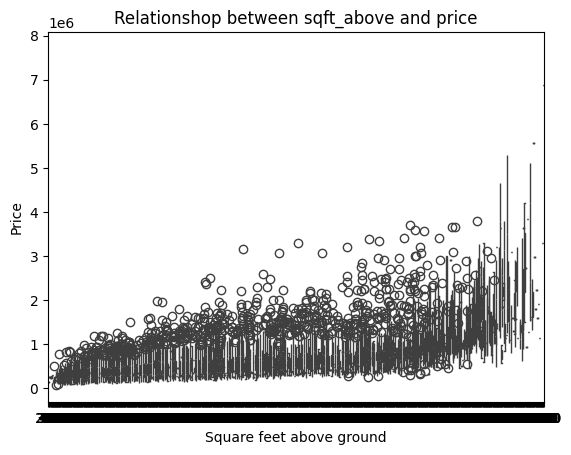

In [74]:
sns.boxplot(x="sqft_above", y="price", data = df)
plt.title("Relationshop between sqft_above and price")
plt.xlabel("Square feet above ground")
plt.ylabel("Price")
plt.show

In [63]:
x = df[["sqft_living"]]
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R - squared
r2 = r2_score(y_test, y_pred)
print(f"R - squared value: {r2}")

R - squared value: -0.0007204099921620521


In [64]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

In [66]:
x = df[features]
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R - squared value: {r2}")

R - squared value: -0.0007204099921620521


In [67]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

In [69]:
x = df[features]
y = df["price"]
# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree = 2)),
    ('linear_regression', LinearRegression())
])
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Fit the pipeline
pipeline.fit(X_train, y_train)
# Make predictions on the test set
y_pred = pipeline.predict(X_test)
# Calculate R - squared
r2 = r2_score(y_test, y_pred)
print(f"R - squared value: {r2}")

R - squared value: 0.0031082355607973122


In [72]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     
x = df[features]
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)
# Make predictions on the test set
y_pred = ridge.predict(X_test)
# Calculate R - squared
r2 = r2_score(y_test, y_pred)
print(f"R - squared value: {r2}")

R - squared value: -0.0007203167811573596


In [73]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     
x = df[features]
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# Create and fit the Ridge regression model
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train_poly, y_train)
# Make predictions on the test set
y_pred = ridge.predict(X_test_poly)
# Calculate R - squared
r2 = r2_score(y_test, y_pred)
print(f"R - squared value: {r2}")

R - squared value: -0.0007022764731468012
